In [4]:
import os
import winsound

import librosa
import librosa.display
import IPython.display

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# path 정보 확인
print(os.getcwd())

target_path = "d:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300"
print(target_path)

d:\GH\Audio\DSP
d:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300


In [11]:
filename = os.path.join(target_path, 'V300 high priority alarm 01.wav')
y, sr = librosa.load(filename, sr=44100)

print(y, sr)

[-0.00772095 -0.006073   -0.00889587 ...  0.          0.
  0.        ] 44100


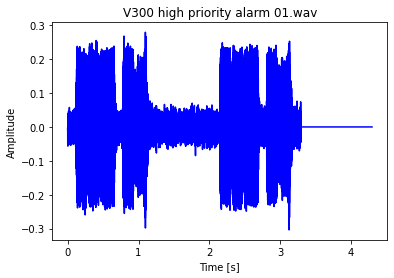

In [13]:
time = np.linspace(0, len(y)/sr, len(y)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(time, y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('V300 high priority alarm 01.wav') # 제목
plt.show()

In [14]:
winsound.PlaySound(filename, winsound.SND_FILENAME)

C:\Users\angel\anaconda3\envs\tf_dl\lib\site-packages\librosa\util\decorators.py:88: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  return f(*args, **kwargs)


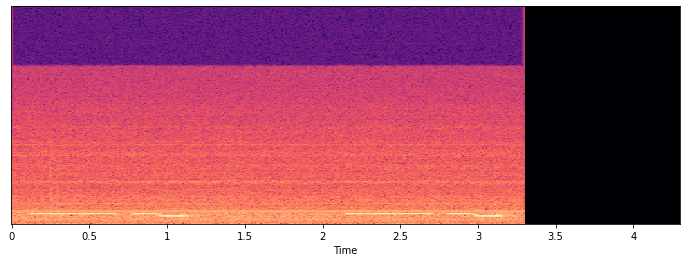

In [16]:
S = librosa.core.stft(y, n_fft=1024, hop_length=512, win_length=1024)
D = np.abs(S)**2
log_S = librosa.power_to_db(S, ref=np.max) #소리의 단위를 db로 바꿈 

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=44100, x_axis='time')

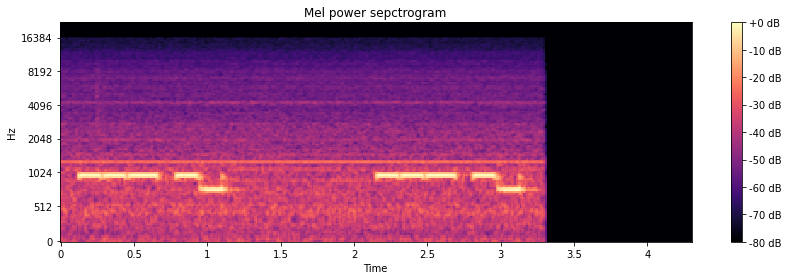

In [15]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels = 128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

(13, 371)


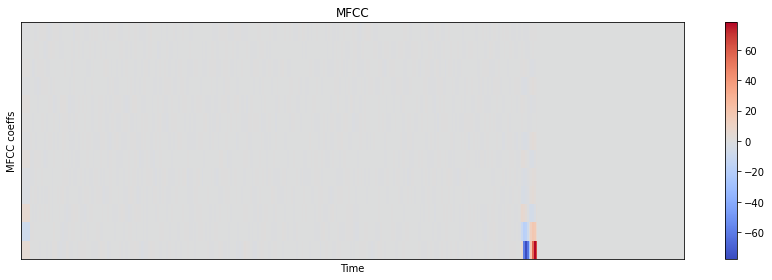

In [17]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc.shape)

plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()